# Статистика курса валют

### Парсинг данных

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings ('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import max_error

In [13]:
data=pd.read_excel("Valute.xlsx")

In [14]:
data

,nominal,data,curs,cdx
0,1,2022-05-20,64.9358,Евро
1,1,2022-05-19,66.6135,Евро
2,1,2022-05-18,66.3644,Евро
3,1,2022-05-17,65.8166,Евро
4,1,2022-05-14,65.7939,Евро
...,...,...,...,...
2215,1,2013-05-25,40.5140,Евро
2216,1,2013-05-24,40.4026,Евро
2217,1,2013-05-23,40.3372,Евро
2218,1,2013-05-22,40.1903,Евро


In [15]:
data.shape

(2220, 4)

### Предобработка данных

In [17]:
data['data']=pd.to_datetime(data['data'], errors='ignore')

In [22]:
data['year'] = data['data'].dt.year
data['month'] = data['data'].dt.month
data['day'] = data['data'].dt.day

In [23]:
data

,nominal,data,curs,cdx,year,month,day
0,1,2022-05-20,64.9358,Евро,2022,5,20
1,1,2022-05-19,66.6135,Евро,2022,5,19
2,1,2022-05-18,66.3644,Евро,2022,5,18
3,1,2022-05-17,65.8166,Евро,2022,5,17
4,1,2022-05-14,65.7939,Евро,2022,5,14
...,...,...,...,...,...,...,...
2215,1,2013-05-25,40.5140,Евро,2013,5,25
2216,1,2013-05-24,40.4026,Евро,2013,5,24
2217,1,2013-05-23,40.3372,Евро,2013,5,23
2218,1,2013-05-22,40.1903,Евро,2013,5,22


### Аналитика

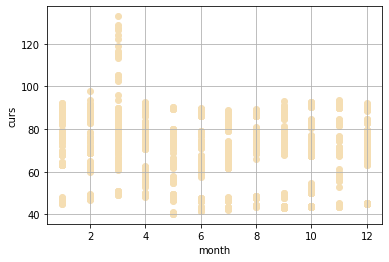

In [29]:
plt.scatter(data.month, data.curs , color ='wheat')
plt.xlabel("month")
plt.ylabel("curs")
plt.grid()
plt.show()

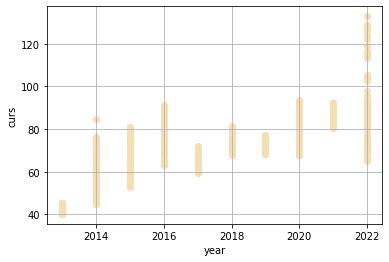

In [31]:
plt.scatter(data.year, data.curs , color ='wheat')
plt.xlabel("year")
plt.ylabel("curs")
plt.grid()
plt.show()

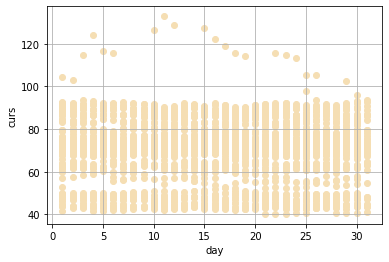

In [33]:
plt.scatter(data.day, data.curs , color ='wheat')
plt.xlabel("day")
plt.ylabel("curs")
plt.grid()
plt.show()

### Линейная регрессия

*Регрессионный анализ:*

In [35]:
lbl=LabelEncoder()
nomeric=data.select_dtypes(exclude=[np.number])
cols=nomeric.columns.values
for col in cols:
    data[col]=lbl.fit_transform(data[col].astype(str))

In [36]:
scal=StandardScaler()
df_scaler=scal.fit_transform(data.drop("curs",axis=1))
pd.DataFrame(df_scaler, columns=data.drop("curs",axis=1).columns)

,nominal,data,cdx,year,month,day
0,0.0,1.731271,0.0,1.769756,-0.500752,0.432895
1,0.0,1.729710,0.0,1.769756,-0.500752,0.318255
2,0.0,1.728150,0.0,1.769756,-0.500752,0.203615
3,0.0,1.726590,0.0,1.769756,-0.500752,0.088975
4,0.0,1.725029,0.0,1.769756,-0.500752,-0.254945
...,...,...,...,...,...,...
2215,0.0,-1.725029,0.0,-1.656906,-0.500752,1.006095
2216,0.0,-1.726590,0.0,-1.656906,-0.500752,0.891455
2217,0.0,-1.728150,0.0,-1.656906,-0.500752,0.776815
2218,0.0,-1.729710,0.0,-1.656906,-0.500752,0.662175


In [37]:
msk=np.random.rand(len(data)) <0.8
train=data[msk]
test=data[~msk]

In [39]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x=np.asanyarray(train[['month']])
train_y=np.asanyarray(train[['curs']])
regr.fit(train_x, train_y)
print('Coefficients:',regr.coef_)
print('Intercept:',regr.intercept_)

Coefficients: [[-0.34518178]]
Intercept: [72.74869083]


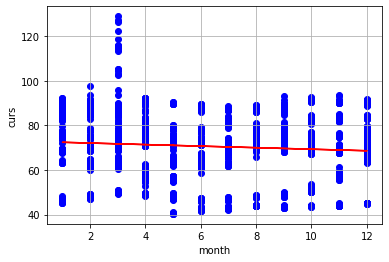

In [40]:
plt.scatter(train.month, train.curs , color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("month")
plt.ylabel("curs")
plt.grid()

*Зависимость курса от года*

In [41]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x=np.asanyarray(train[['year']])
train_y=np.asanyarray(train[['curs']])
regr.fit(train_x, train_y)
print('Coefficients:',regr.coef_)
print('Intercept:',regr.intercept_)

Coefficients: [[4.42910232]]
Intercept: [-8864.49500707]


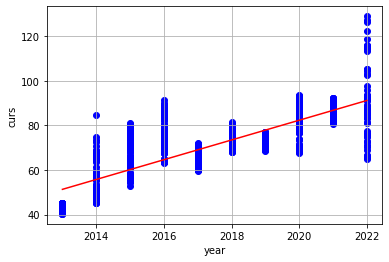

In [43]:
plt.scatter(train.year, train.curs , color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("year")
plt.ylabel("curs")
plt.grid()

*Зависимость курса валют от дня*

In [44]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x=np.asanyarray(train[['day']])
train_y=np.asanyarray(train[['curs']])
regr.fit(train_x, train_y)
print('Coefficients:',regr.coef_)
print('Intercept:',regr.intercept_)

Coefficients: [[-0.02197354]]
Intercept: [70.81435001]


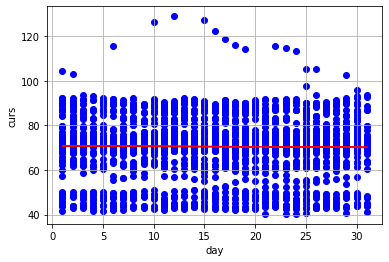

In [45]:
plt.scatter(train.day, train.curs , color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("day")
plt.ylabel("curs")
plt.grid()

*Зависимость курса валют от общей даты*

In [46]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x=np.asanyarray(train[['data']])
train_y=np.asanyarray(train[['curs']])
regr.fit(train_x, train_y)
print('Coefficients:',regr.coef_)
print('Intercept:',regr.intercept_)

Coefficients: [[0.01814034]]
Intercept: [50.4584278]


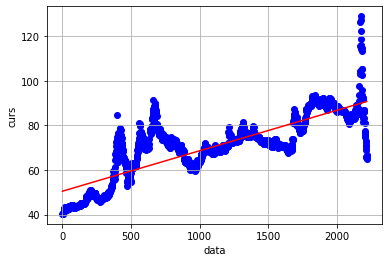

In [47]:
plt.scatter(train.data, train.curs , color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("data")
plt.ylabel("curs")
plt.grid()

*Лучше всего от курса валют зависит день, так как там больше всего точек пересеклись с линейной регрессией.*

### Статистика курса валют

In [50]:
data.describe()

,nominal,data,curs,cdx,year,month,day
count,2220.0,2220.00000,2220.000000,2220.0,2220.000000,2220.00000,2220.000000
mean,1.0,1109.50000,70.635914,0.0,2017.351802,6.70000,16.223874
std,0.0,641.00312,14.101092,0.0,2.627055,3.39566,8.724922
min,1.0,0.00000,40.190300,0.0,2013.000000,1.00000,1.000000
25%,1.0,554.75000,63.556425,0.0,2015.000000,4.00000,9.000000
50%,1.0,1109.50000,71.715400,0.0,2017.000000,7.00000,16.500000
75%,1.0,1664.25000,79.138425,0.0,2020.000000,10.00000,24.000000
max,1.0,2219.00000,132.958100,0.0,2022.000000,12.00000,31.000000


*По статистике можно сказать, что выбросов в данных нету, так как медианное и среднее значение значительно не отличаются, дисперсия в данных плохая только в признаке data, но это нормально, так как остальные атрибуты имеют хорошее стандартное отклонение.*